In [1]:
### ValDXer testing
import os
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import concurrent.futures
settings = Settings(name='test')

VDX = ValDXer(settings)

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name test already exists. Attempting to change name to test0
Experiment name test already exists. Attempting to change name to test1
Experiment name test already exists. Attempting to change name to test2
Experiment name test already exists. Attempting to change name to test3
Experiment name test already exists. Attempting to change name to test4
Experiment name test already exists. Attempting to change name to test5
Experiment name test already exists. Attempting to change name to test6
Experiment name test already exists. Attempting to change name to test7
Experiment name test already exists. Attempting to change name to test8
Experiment name test already exists. Attempting to change name to test9
Experiment name test already exists. Attempting to change name to test10
Experiment name test already exists. Attempting to change name to test11
Experiment name test already exists. Attempting to change name 

In [2]:
# BPTI data
BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"

expt_name = 'BPTI_expt'


In [3]:
expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

os.listdir(expt_dir)

segs_name = "BPTI_residue_segs.txt"
segs_path = os.path.join(expt_dir, segs_name)

hdx_name = "BPTI_expt_dfracs.dat"
hdx_path = os.path.join(expt_dir, hdx_name)
print(hdx_path)

rates_name = "BPTI_Intrinsic_rates.dat"
rates_path = os.path.join(expt_dir, rates_name)


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat


In [4]:

VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)


Preparing HDX data for BPTI_expt
AVG: ncol = 6, len(names) = 4


In [5]:
print(VDX.paths)


                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   

                                                 SEG  calc_name  experimental  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  BPTI_expt         False   
1                                                NaN  BPTI_expt         False   

                                           int_rates  
0                                                NaN  
1  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  


In [6]:
sim_name = 'BPTI_MD'

sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

os.listdir(sim_dir)

md_reps = 1

rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

top_name = "bpti_5pti_eq6_protonly.gro"

top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

traj_name = "bpti_5pti_reimg_protonly.xtc"

traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

print(top_path)
print(traj_paths)


VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=sim_name)

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro
['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc']
                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   
2                                                NaN   

                                                 SEG  calc_name experimental  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  BPTI_expt        False   
1                                                NaN  BPTI_expt        False   
2                                                NaN    BPTI_MD          NaN   

                                           int_rates  \
0                                           

In [7]:
test_name = "BPTI_RW_test"
VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)
VDX.split_segments(seg_name=expt_name, calc_name=test_name, rep=1)


                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   
2                                                NaN   
3                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...     BPTI_expt   
1                                                NaN     BPTI_expt   
2                                                NaN       BPTI_MD   
3                                                NaN  BPTI_RW_test   

  experimental                                          int_rates  \
0        False                                                NaN   
1        False  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
2          NaN                                                NaN   
3          NaN                                                NaN   

                      

('BPTI_RW_test', 'train_BPTI_RW_test_1', 'val_BPTI_RW_test_1')

In [8]:
# df, rep_name = VDX.predict_HDX(calc_name=test_name, rep=1, train=True)

In [9]:
# train_gamma, rw_df = VDX.reweight_HDX(expt_name=expt_name, calc_name=test_name, rep=1, train=True)

In [10]:
VDX.paths

,HDX,SEG,calc_name,experimental,int_rates,top,traj
0,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,BPTI_expt,False,NaN,NaN,NaN
1,NaN,NaN,BPTI_expt,False,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,NaN,NaN
2,NaN,NaN,BPTI_MD,NaN,NaN,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,[/Users/alexi/Library/CloudStorage/OneDrive-Ne...
3,NaN,NaN,BPTI_RW_test,NaN,NaN,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,[/Users/alexi/Library/CloudStorage/OneDrive-Ne...


In [11]:
# df, rep_name = VDX.predict_HDX(calc_name=test_name, rep=1, train=False)

In [12]:
# opt_gamma, rw_df = VDX.reweight_HDX(expt_name=expt_name, calc_name=test_name, rep=1, train=False, train_gamma=train_gamma)

Removing contents /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/train_BPTI_RW_test_1
Removing contents /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/val_BPTI_RW_test_1
Saved train BPTI_RW_test segments to /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/train_BPTI_RW_test_1/train_residue_segs__BPTI_RW_test_.txt
Train Peptide numbers: [ 0  1  2  3  4  5  6  8  9 11 12 13 15 16 17 19 21 23 24 25 26 27 29 30
 31 32 33 34 35 36 37 39 40]
Saved val BPTI_RW_test segments to /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/val_BPTI_RW_test_1/val_residue_segs__BPTI_RW_test_.txt
Val Peptide numbers: [ 7 10 14 18 20 22 28 38]
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/train_BPTI_RW_test_1
BPTI_

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
BPTI_expt BPTI_RW_test True 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/train_BPTI_RW_test_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/train_BPTI_RW_test_1/out__train_BPTI_RW_test_1Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/train_BPTI_RW_test_1/reweighting_gamma_4x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/train_BPTI_RW_test_1/reweighting_gamma_3x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/train_BPTI_RW_test_1/reweighting_

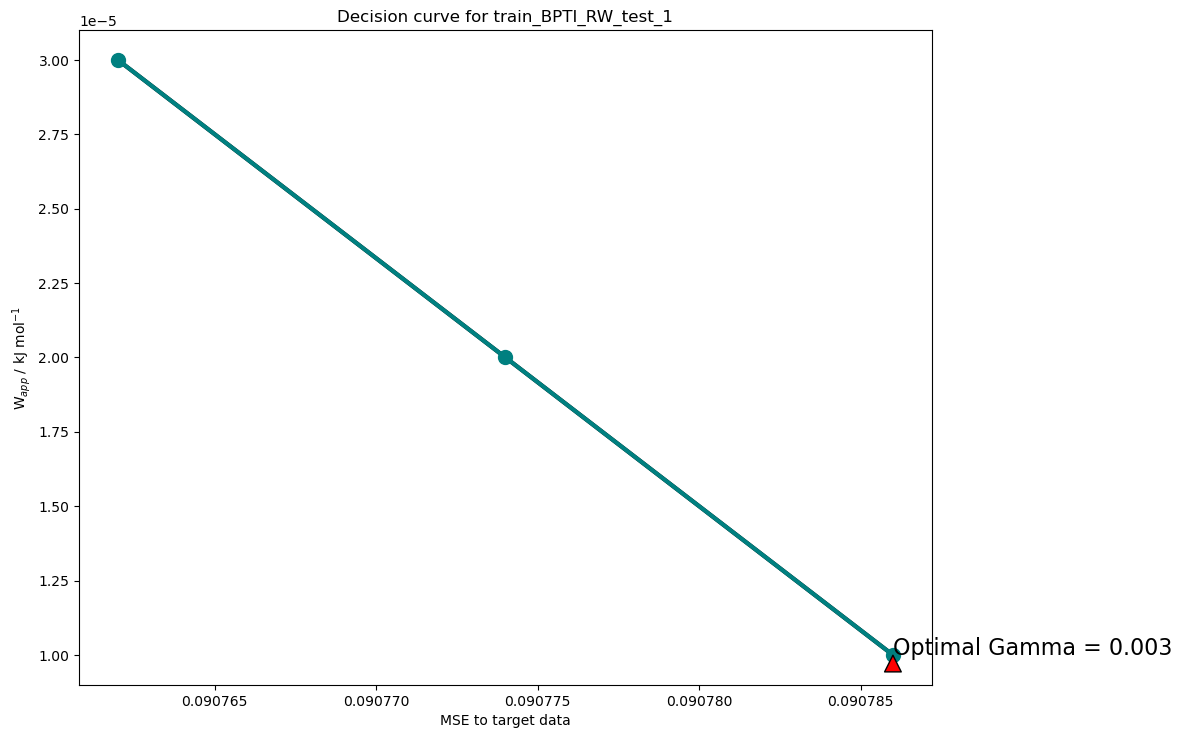

Optimal gamma for train_BPTI_RW_test_1 is 3x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/train_BPTI_RW_test_1/reweighting_gamma_3x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(41, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.14342  0.60426  0.99991  1.00000        0
1  0.01231  0.07150  0.52379  0.99986        1
2  0.27055  0.84878  1.00000  1.00000        2
3  0.29663  0.87840  1.00000  1.00000        3
4  0.97173  1.00000  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.14342  0.60426  0.99991  1.00000        0
1   0.01231  0.07150  0.52379  0.99986        1
2   0.27055  0.84878  1.00000  1.00000        2
3   0.29663  0.87840  1.00000  1.00000        3
4   0.97173  1.00000  1.00000  1.00000        4
5   0.78045  0.99989  1.00000  1.00000        5
6   0.98785  1.00000  1.00000  1.00000        6
7   0.33266  0.91124  1.00000  1.00000        7
8   0.00657  0.03

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
BPTI_expt BPTI_RW_test False 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/val_BPTI_RW_test_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/train_BPTI_RW_test_1/out__train_BPTI_RW_test_1Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/val_BPTI_RW_test_1/reweighting_gamma_4x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/val_BPTI_RW_test_1/reweighting_gamma_3x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/val_BPTI_RW_test_1/reweighting_gamma_5

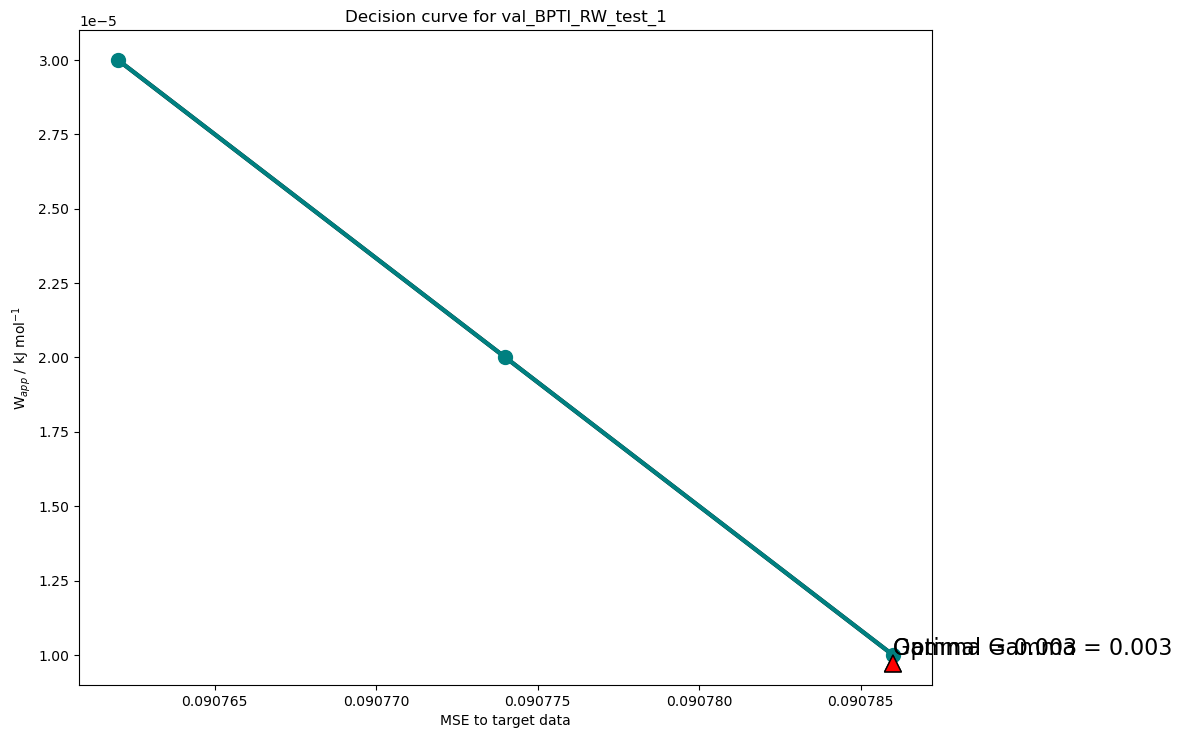

Optimal gamma for val_BPTI_RW_test_1 is 3x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/val_BPTI_RW_test_1/reweighting_gamma_3x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(41, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.14342  0.60426  0.99991  1.00000        0
1  0.01231  0.07150  0.52379  0.99986        1
2  0.27055  0.84878  1.00000  1.00000        2
3  0.29663  0.87840  1.00000  1.00000        3
4  0.97173  1.00000  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.14342  0.60426  0.99991  1.00000        0
1   0.01231  0.07150  0.52379  0.99986        1
2   0.27055  0.84878  1.00000  1.00000        2
3   0.29663  0.87840  1.00000  1.00000        3
4   0.97173  1.00000  1.00000  1.00000        4
5   0.78045  0.99989  1.00000  1.00000        5
6   0.98785  1.00000  1.00000  1.00000        6
7   0.33266  0.91124  1.00000  1.00000        7
8   0.00657  0.03869 

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
BPTI_expt BPTI_RW_test True 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/train_BPTI_RW_test_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/train_BPTI_RW_test_1/out__train_BPTI_RW_test_1Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/train_BPTI_RW_test_2/reweighting_gamma_3x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/train_BPTI_RW_test_2/reweighting_gamma_4x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/train_BPTI_RW_test_2/reweighting_

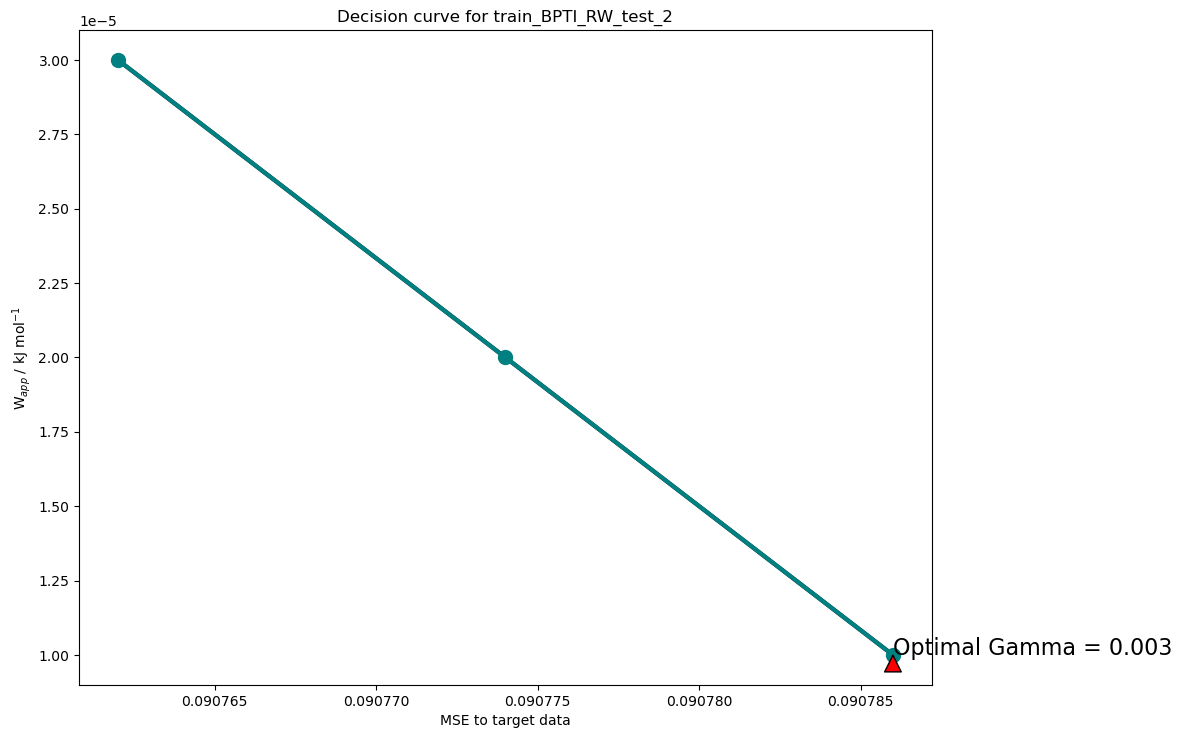

Optimal gamma for train_BPTI_RW_test_2 is 3x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/train_BPTI_RW_test_2/reweighting_gamma_3x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(41, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.14342  0.60426  0.99991  1.00000        0
1  0.01231  0.07150  0.52379  0.99986        1
2  0.27055  0.84878  1.00000  1.00000        2
3  0.29663  0.87840  1.00000  1.00000        3
4  0.97173  1.00000  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.14342  0.60426  0.99991  1.00000        0
1   0.01231  0.07150  0.52379  0.99986        1
2   0.27055  0.84878  1.00000  1.00000        2
3   0.29663  0.87840  1.00000  1.00000        3
4   0.97173  1.00000  1.00000  1.00000        4
5   0.78045  0.99989  1.00000  1.00000        5
6   0.98785  1.00000  1.00000  1.00000        6
7   0.33266  0.91124  1.00000  1.00000        7
8   0.00657  0.03

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
BPTI_expt BPTI_RW_test False 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/val_BPTI_RW_test_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/train_BPTI_RW_test_1/out__train_BPTI_RW_test_1Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/val_BPTI_RW_test_2/reweighting_gamma_4x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/val_BPTI_RW_test_2/reweighting_gamma_5x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/val_BPTI_RW_test_2/reweighting_gamma_3

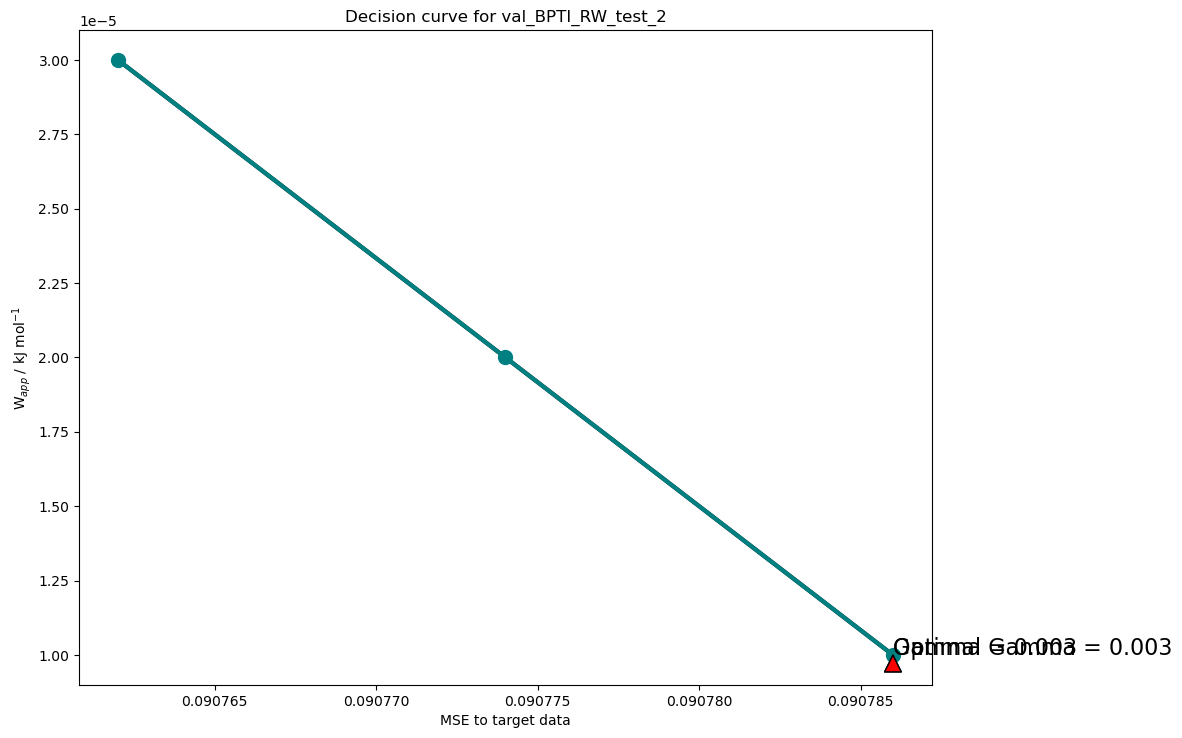

Optimal gamma for val_BPTI_RW_test_2 is 3x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test186/val_BPTI_RW_test_2/reweighting_gamma_3x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(41, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.14342  0.60426  0.99991  1.00000        0
1  0.01231  0.07150  0.52379  0.99986        1
2  0.27055  0.84878  1.00000  1.00000        2
3  0.29663  0.87840  1.00000  1.00000        3
4  0.97173  1.00000  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.14342  0.60426  0.99991  1.00000        0
1   0.01231  0.07150  0.52379  0.99986        1
2   0.27055  0.84878  1.00000  1.00000        2
3   0.29663  0.87840  1.00000  1.00000        3
4   0.97173  1.00000  1.00000  1.00000        4
5   0.78045  0.99989  1.00000  1.00000        5
6   0.98785  1.00000  1.00000  1.00000        6
7   0.33266  0.91124  1.00000  1.00000        7
8   0.00657  0.03869 

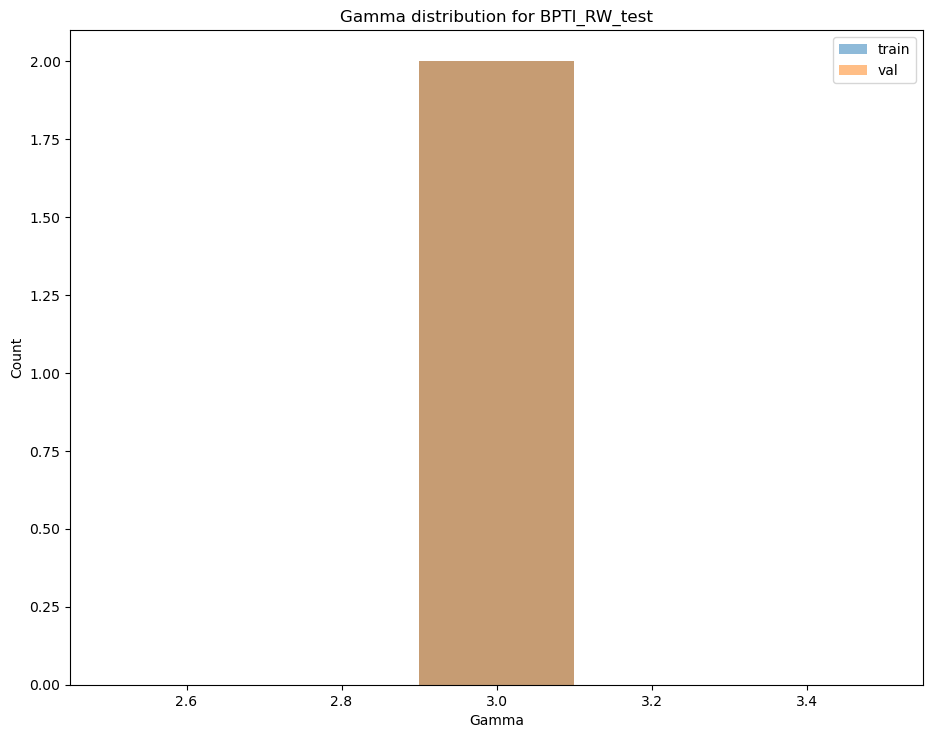

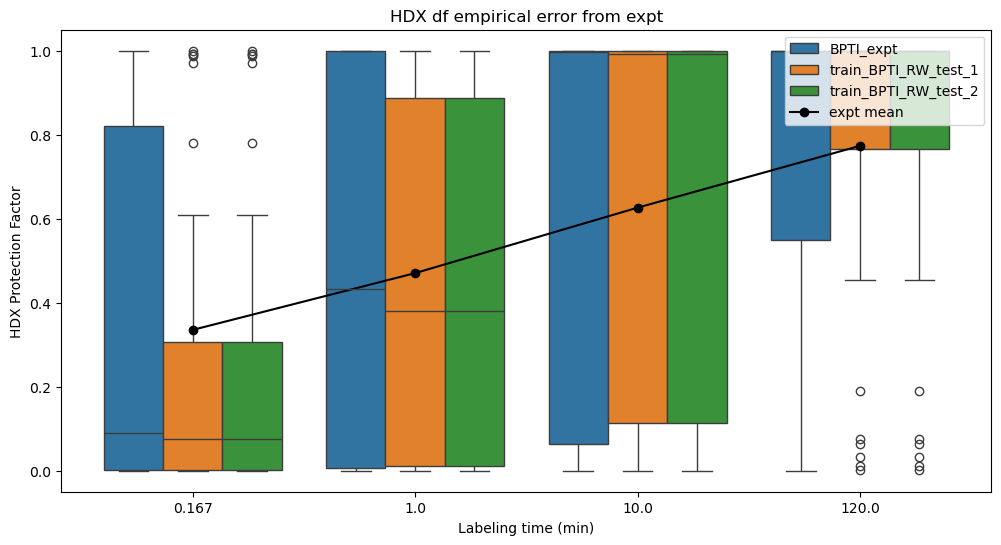

      0.167      1.0     10.0    120.0  peptide  calc_name
0   0.15669  0.63957  0.99996  1.00000        0  BPTI_expt
1   0.09039  0.43293  0.99656  1.00000        1  BPTI_expt
2   0.02665  0.14933  0.80157  1.00000        2  BPTI_expt
3   0.18680  0.71010  1.00000  1.00000        3  BPTI_expt
4   0.99880  1.00000  1.00000  1.00000        4  BPTI_expt
5   0.82092  0.99997  1.00000  1.00000        5  BPTI_expt
6   0.23198  0.79413  1.00000  1.00000        6  BPTI_expt
7   1.00000  1.00000  1.00000  1.00000        7  BPTI_expt
8   0.00028  0.00165  0.01638  0.17975        8  BPTI_expt
9   0.91192  1.00000  1.00000  1.00000        9  BPTI_expt
10  0.00005  0.00030  0.00298  0.03517       10  BPTI_expt
11  0.00000  0.00000  0.00003  0.00037       11  BPTI_expt
12  0.00000  0.00000  0.00003  0.00037       12  BPTI_expt
13  0.00000  0.00000  0.00003  0.00037       13  BPTI_expt
14  0.00039  0.00232  0.02300  0.24364       14  BPTI_expt
15  1.00000  1.00000  1.00000  1.00000       15  BPTI_ex

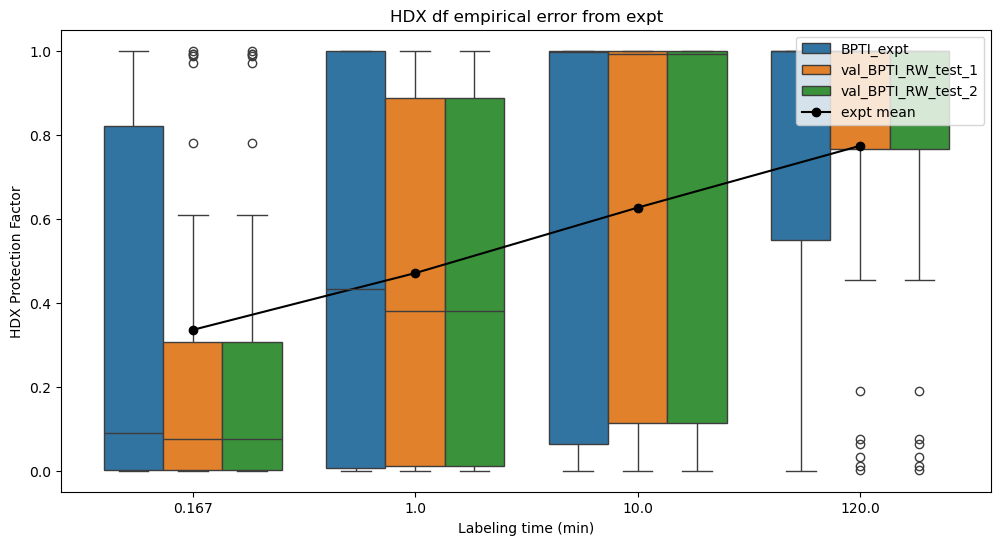

Empty DataFrame
Columns: [0.167, 1.0, 10.0, 120.0, peptide, calc_name]
Index: []
ARGUMENTS
['BPTI_expt', 'train_BPTI_RW_test_avg', 'val_BPTI_RW_test_avg']
Index([0.167, 1.0, 10.0, 120.0, 'peptide', 'calc_name'], dtype='object')
['train_BPTI_RW_test_all' 'train_BPTI_RW_test_all'
 'train_BPTI_RW_test_all' 'train_BPTI_RW_test_all'
 'train_BPTI_RW_test_all' 'train_BPTI_RW_test_all'
 'train_BPTI_RW_test_all' 'train_BPTI_RW_test_all'
 'train_BPTI_RW_test_all' 'train_BPTI_RW_test_all'
 'train_BPTI_RW_test_all' 'train_BPTI_RW_test_all'
 'train_BPTI_RW_test_all' 'train_BPTI_RW_test_all'
 'train_BPTI_RW_test_all' 'train_BPTI_RW_test_all'
 'train_BPTI_RW_test_all' 'train_BPTI_RW_test_all'
 'train_BPTI_RW_test_all' 'train_BPTI_RW_test_all'
 'train_BPTI_RW_test_all' 'train_BPTI_RW_test_all'
 'train_BPTI_RW_test_all' 'train_BPTI_RW_test_all'
 'train_BPTI_RW_test_all' 'train_BPTI_RW_test_all'
 'train_BPTI_RW_test_all' 'train_BPTI_RW_test_all'
 'train_BPTI_RW_test_all' 'train_BPTI_RW_test_all'
 'train

ValueError: Could not interpret value `time` for `x`. An entry with this name does not appear in `data`.

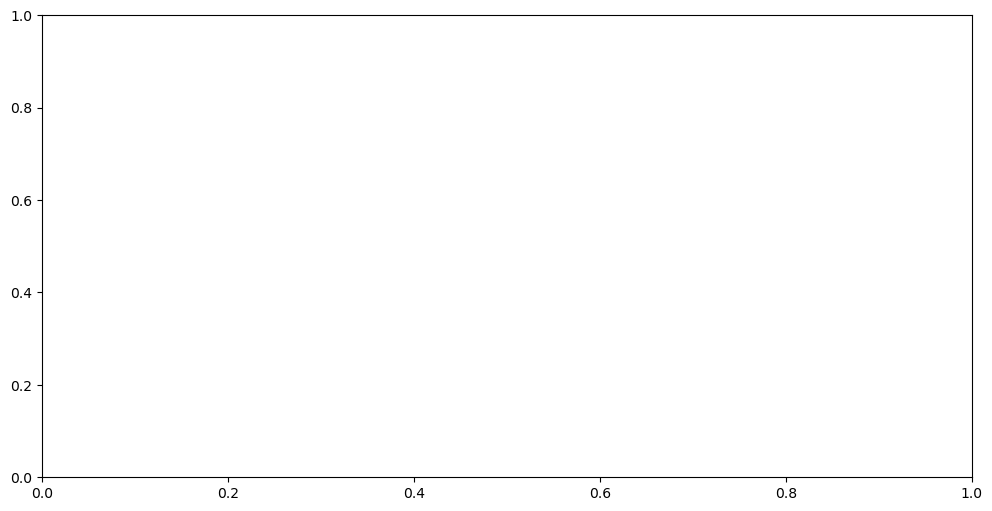

In [13]:
VDX.run_VDX(expt_name=expt_name, calc_name=test_name)

In [ ]:
VDX.HDX_data

,0.167,1.0,10.0,120.0,peptide,calc_name
0,0.15669,0.63957,0.99996,1.00000,0,BPTI_expt
1,0.09039,0.43293,0.99656,1.00000,1,BPTI_expt
2,0.02665,0.14933,0.80157,1.00000,2,BPTI_expt
3,0.18680,0.71010,1.00000,1.00000,3,BPTI_expt
4,0.99880,1.00000,1.00000,1.00000,4,BPTI_expt
...,...,...,...,...,...,...
200,0.00419,0.02483,0.22228,0.95103,36,val_BPTI_RW_test_2
201,0.20225,0.74156,1.00000,1.00000,37,val_BPTI_RW_test_2
202,0.16088,0.65017,0.99997,1.00000,38,val_BPTI_RW_test_2
203,0.00684,0.04024,0.33682,0.99276,39,val_BPTI_RW_test_2


,HDX,SEG,calc_name,experimental,int_rates,top,traj
0,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,BPTI_expt,False,NaN,NaN,NaN
1,NaN,NaN,BPTI_expt,False,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,NaN,NaN
2,NaN,NaN,BPTI_MD,NaN,NaN,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,[/Users/alexi/Library/CloudStorage/OneDrive-Ne...
3,NaN,NaN,BPTI_RW_test,NaN,NaN,/Users/alexi/Library/CloudStorage/OneDrive-Nex...,[/Users/alexi/Library/CloudStorage/OneDrive-Ne...
